## Import Required Packages

In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import librosa
import librosa.display
import numpy as np
from tqdm import tqdm
import ipywidgets as widgets
from pathlib import Path
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from tensorflow.keras.optimizers import Adam
%matplotlib inline

## Plot an audio signal using librosa

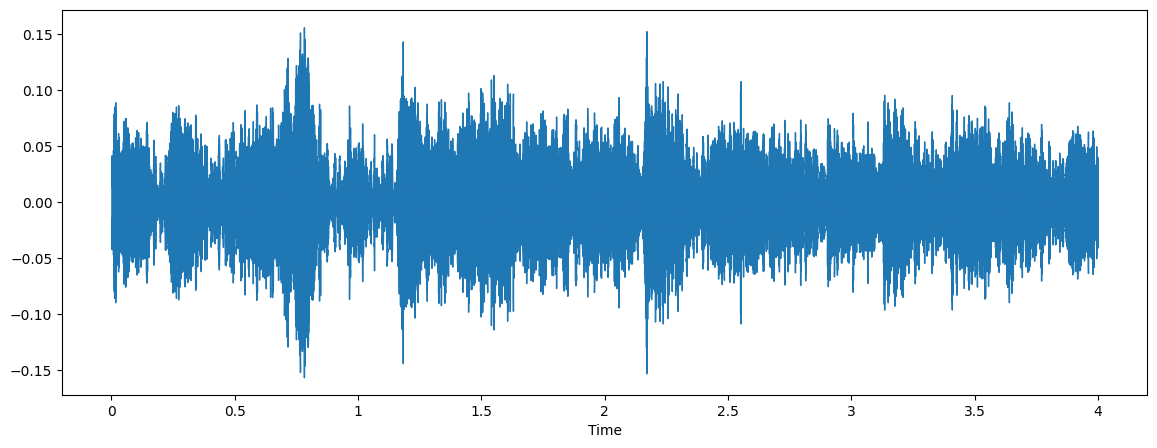

In [2]:
filename = "E:\\MyProjects\\Audio Classification\\UrbanSound8K\\audio\\fold2\\14387-9-0-11.wav"
plt.figure(figsize = (14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [3]:
np.shape(data)

(88200,)

In [4]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [5]:
wave_sample_rate

44100

In [6]:
np.shape(wave_audio)

(176400, 2)

## Read metadata

In [7]:
import pandas as pd
csv = "E:\\MyProjects\\Audio Classification\\UrbanSound8K\\metadata\\UrbanSound8K.csv"
metadata = pd.read_csv(csv)
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


## Comparison between librosa and scipy

In [8]:
filename = "E:\\MyProjects\\Audio Classification\\UrbanSound8K\\audio\\fold5\\100263-2-0-3.wav"

In [9]:
librosa_audio_data, librosa_sample_rate = librosa.load(filename)

In [10]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


In [11]:
np.shape(librosa_audio_data)

(88200,)

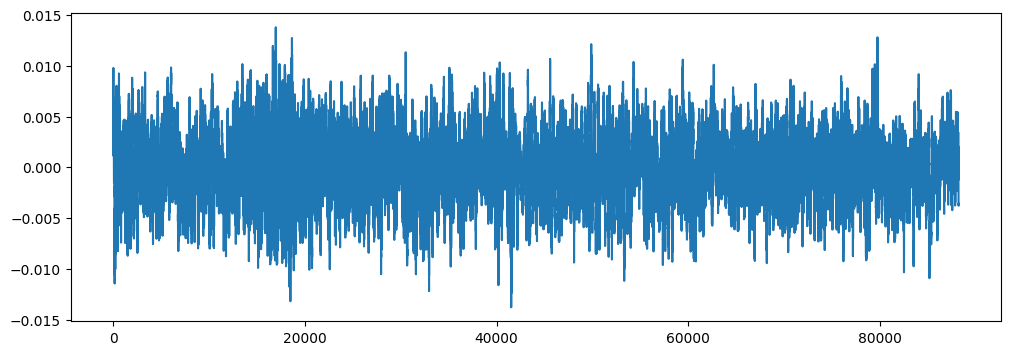

In [12]:
plt.figure(figsize = (12,4))
plt.plot(librosa_audio_data)

In [13]:
wave_sample_rate, wave_audio =wav.read(filename)

In [14]:
np.shape(wave_audio)

(176400, 2)

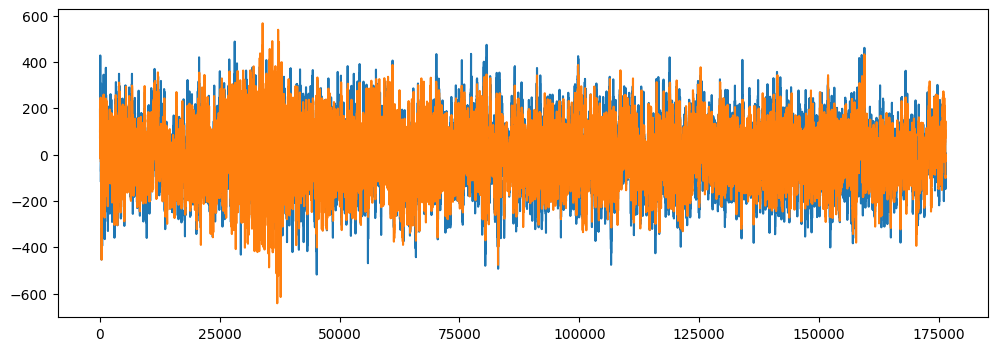

In [15]:
plt.figure(figsize = (12,4))
plt.plot(wave_audio)

In [16]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data,  sr = librosa_sample_rate, n_mfcc = 50)
print(mfccs.shape)

(50, 173)


In [17]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085263e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299151e+02],
       [-1.8326149e+01, -2.4682453e+01, -3.0259777e+01, ...,
        -8.2357597e+00, -9.0665350e+00, -4.5019560e+00],
       ...,
       [-5.3299665e-02, -4.2274046e-01, -8.1741905e-01, ...,
         1.9146457e+00,  1.4688025e+00,  1.1370830e-01],
       [-3.4652917e+00, -1.0896212e+00, -1.2736593e+00, ...,
        -3.4908135e+00, -6.0305424e+00, -4.5593529e+00],
       [ 2.7464774e+00,  3.6204081e+00,  2.8760877e+00, ...,
         3.5562820e+00,  1.0366318e+00,  1.0524697e+00]], dtype=float32)

## Extract features from the audio files

In [18]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc = 100)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    return mfccs_scaled_features

In [19]:
extracted_features = []
import resampy
for index, row in tqdm(metadata.iterrows()):
    file_name = os.path.join('E:/MyProjects/Audio Classification/UrbanSound8K/audio'+'/' + 'fold' + str(row['fold']) + '/', str(row['slice_file_name']))
    class_labels = row['class']
    data = feature_extractor(file_name)
    extracted_features.append([data, class_labels])

3554it [04:04, 15.12it/s]C:\Users\Asus\anaconda3\envs\tf_gpu\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [09:09, 17.15it/s]C:\Users\Asus\anaconda3\envs\tf_gpu\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [09:09, 20.06it/s]C:\Users\Asus\anaconda3\envs\tf_gpu\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:34, 15.21it/s]


In [20]:
df = pd.DataFrame(extracted_features, columns = ['feature', 'class'])
df

,feature,class
0,"[-211.93698, 62.581207, -122.81315, -60.74528,...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690277,...",children_playing
...,...,...
8727,"[-391.3721, 125.36239, -40.634056, 25.899754, ...",car_horn
8728,"[-339.42715, 76.409096, -35.30988, 41.984035, ...",car_horn
8729,"[-297.31534, 102.09026, -36.75108, 26.816488, ...",car_horn
8730,"[-336.92386, 115.313896, -44.847095, 24.968985...",car_horn


In [21]:
X = np.array(df['feature'].tolist())
y = np.array(df['class'].tolist())

In [22]:
X.shape

(8732, 100)

In [23]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [24]:
y.shape

(8732,)

## Label encoding for the labels

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
labelencoder = LabelEncoder()
y_encoded = labelencoder.fit_transform(y)
y = to_categorical(y_encoded)

## Class mapping

In [26]:
# Print the mapping of indices to class labels
class_mapping = {index: label for index, label in enumerate(labelencoder.classes_)}
print(class_mapping)

{0: 'air_conditioner', 1: 'car_horn', 2: 'children_playing', 3: 'dog_bark', 4: 'drilling', 5: 'engine_idling', 6: 'gun_shot', 7: 'jackhammer', 8: 'siren', 9: 'street_music'}


In [27]:
np.shape(y)

(8732, 10)

In [28]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [30]:
X_train.shape

(6985, 100)

In [31]:
y_test.shape

(1747, 10)

In [32]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import Model
import tensorflow as tf

In [33]:
input_shape = X_train.shape[1]
num_classes = y_train.shape[1]
print(num_classes)
print(input_shape)

10
100


## Build the model

In [40]:
input = tf.keras.layers.Input(shape = (input_shape,))
x = Dense(32, activation = 'relu')(input)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(1024, activation = 'relu')(x)
output = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = input, outputs = output)

model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = Adam(learning_rate=0.0001))

In [41]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 713,834 (2.72 MB)

 Trainable params: 713,834 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 300
batch_size = 16

start = datetime.now()

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, validation_data = (X_test, y_test))
duration = datetime.now() - start
print('Training completed in time: ', duration)

Epoch 1/300
437/437 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2251 - loss: 2.2294 - val_accuracy: 0.4390 - val_loss: 1.6964
Epoch 2/300
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3577 - loss: 1.8286 - val_accuracy: 0.4843 - val_loss: 1.5193
Epoch 3/300
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4273 - loss: 1.6359 - val_accuracy: 0.5352 - val_loss: 1.3822
Epoch 4/300
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4687 - loss: 1.5242 - val_accuracy: 0.5793 - val_loss: 1.2613
Epoch 5/300
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5124 - loss: 1.4219 - val_accuracy: 0.6159 - val_loss: 1.1616
Epoch 6/300
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5383 - loss: 1.3306 - val_accuracy: 0.6457 - val_loss: 1.1049
Epoch 7/300
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5675 - loss: 1.2388 - val_accuracy: 0.6600 - val_loss: 1.0320
Epoch 8/300
437/437 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6034 - loss: 1.1574 - 

## Loss and Accuracy Curves

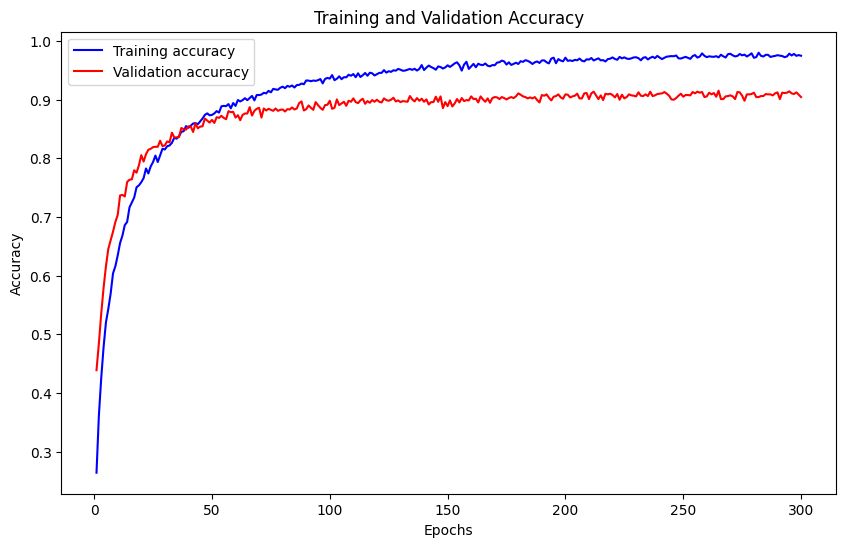

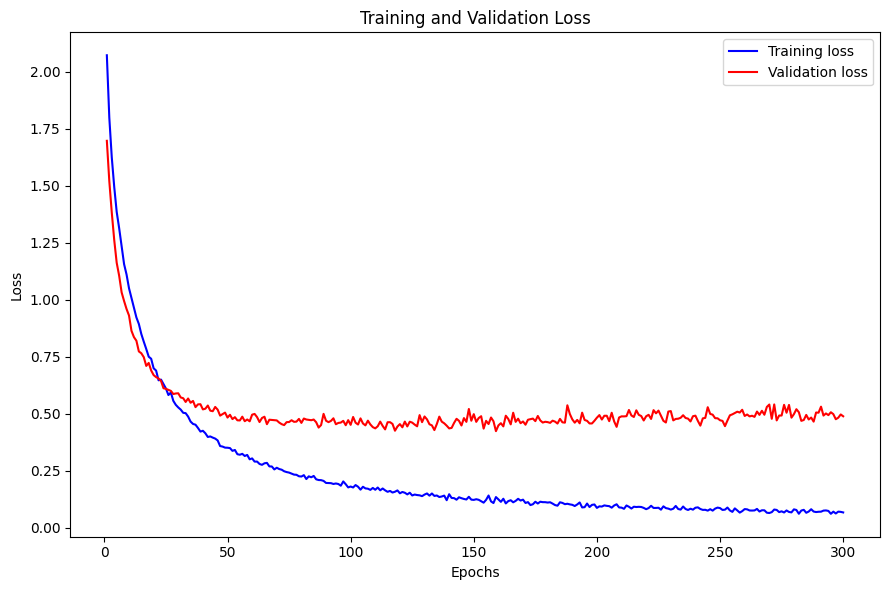

In [43]:
# Extract data from the history object
history_dict = history.history

# Get the number of epochs
epochs = range(1, len(history_dict['loss']) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, history_dict['accuracy'], 'b-', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.figure(figsize=(9, 6))
plt.plot(epochs, history_dict['loss'], 'b-', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Confusion Matrix

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


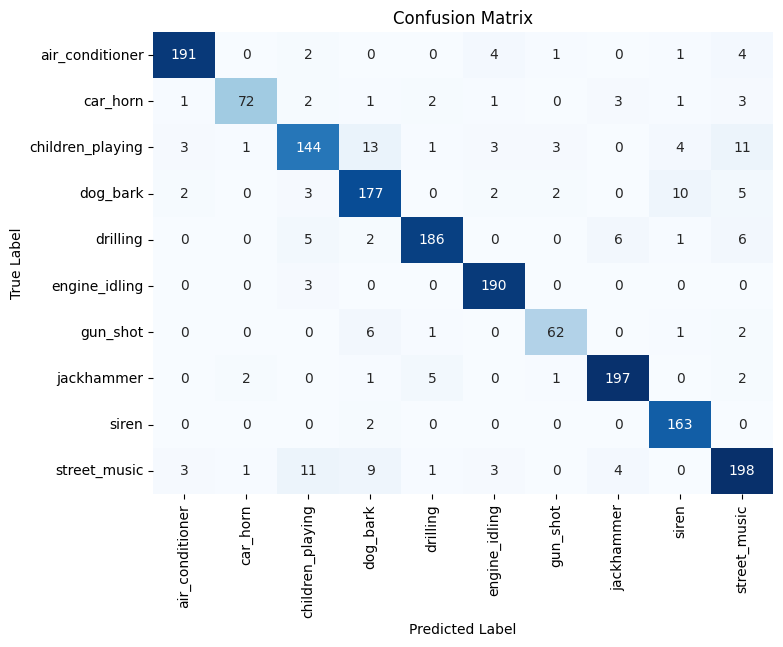

Accuracy: 0.9044075558099599
F1 Score: 0.9038990601339595
Recall: 0.9044075558099599


In [44]:
predictions = model.predict(X_test)
classification_predictions = np.argmax(predictions, axis = 1)
true_labels = np.argmax(y_test, axis = 1)
conf_matrix = confusion_matrix(true_labels, classification_predictions)
accuracy = accuracy_score(true_labels, classification_predictions)
f1 = f1_score(true_labels, classification_predictions, average='weighted')
recall = recall_score(true_labels, classification_predictions, average='weighted')

# Plot the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)

# Set labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Set ticks
tick_labels = [class_mapping[i] for i in range(len(class_mapping))]
plt.xticks(np.arange(len(class_mapping)) + 0.5, tick_labels, rotation = 90)
plt.yticks(np.arange(len(class_mapping)) + 0.5, tick_labels, rotation=0)

plt.show()


# Print metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)

## **Test with Individual Example**

In [45]:
filepath = r"E:\MyProjects\Audio Classification\UrbanSound8K\audio\fold8\14386-9-0-11.wav"
filepath = Path(filepath)

audio, sample_rate = librosa.load(filepath) 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=100)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_probabilities=model.predict(mfccs_scaled_features)
confidence = np.max(predicted_probabilities, axis = 1)
predicted_class_index = np.argmax(predicted_probabilities, axis=1)
predicted_class_label = class_mapping[predicted_class_index[0]]
print("Predicted Class Label:", predicted_class_label)
print("Confidence score: ", confidence[0])
ipd.Audio(filepath)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class Label: street_music
Confidence score:  0.87907404
